# 0.문서 불러오기

In [1]:
docs=['바나나 사과 포도 포도',\
     '사과 포도',\
     '포도 바나나',\
     '짜장면 짬뽕 탕수육',\
     '볶음밥 탕수육'\
     '짜장면 짬뽕',\
     '된장찌개 김치찌개 김치 비빔밥',\
     '김치 된장 비빔밥',\
     '비빔밥 김치',\
     '사과 볶음밥 김치 된장']

# 1. 텍스트마이닝(TF-IDF)

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

n_topic=3

#tfidf선언
tfidf_vect =TfidfVectorizer()
tfidf=tfidf_vect.fit_transform(docs)

#SVD선언
svd =TruncatedSVD(n_components=n_topic)
u_sigma=svd.fit_transform(tfidf)

svd.components_

array([[ 0.37490254,  0.08364115,  0.25612077,  0.08364115,  0.32769074,
         0.1446662 ,  0.31853141,  0.42644624,  0.00446795,  0.02677934,
         0.00446795,  0.02723798,  0.60558352],
       [ 0.5099411 ,  0.14187899,  0.28062332,  0.14187899, -0.28712825,
         0.09654742,  0.50872483, -0.17177061,  0.0041077 ,  0.02132243,
         0.0041077 ,  0.02113743, -0.48984285],
       [-0.0562431 , -0.08818792,  0.11591523, -0.08818792, -0.0922036 ,
         0.47821722, -0.18979534,  0.11970761,  0.29689096,  0.58389954,
         0.29689096,  0.39442863, -0.0866006 ]])

# 2. 토픽모델링

In [4]:
vocab=tfidf_vect.get_feature_names()
n=3

for idx, topic in enumerate(svd.components_):
    print("Topic %d:" % (idx), [(vocab[i], topic[i].round(5)) for i in topic.argsort()[:-n - 1:-1]])

Topic 0: [('포도', 0.60558), ('사과', 0.42645), ('김치', 0.3749)]
Topic 1: [('김치', 0.50994), ('비빔밥', 0.50872), ('된장', 0.28062)]
Topic 2: [('짬뽕', 0.5839), ('볶음밥', 0.47822), ('탕수육짜장면', 0.39443)]


# 3. 벡터를 통한 상관관계

In [ ]:
# 단어벡터간의 상관관계

In [5]:
print(vocab)

['김치', '김치찌개', '된장', '된장찌개', '바나나', '볶음밥', '비빔밥', '사과', '짜장면', '짬뽕', '탕수육', '탕수육짜장면', '포도']


In [7]:
svd.components_.T

array([[ 0.37490254,  0.5099411 , -0.0562431 ],
       [ 0.08364115,  0.14187899, -0.08818792],
       [ 0.25612077,  0.28062332,  0.11591523],
       [ 0.08364115,  0.14187899, -0.08818792],
       [ 0.32769074, -0.28712825, -0.0922036 ],
       [ 0.1446662 ,  0.09654742,  0.47821722],
       [ 0.31853141,  0.50872483, -0.18979534],
       [ 0.42644624, -0.17177061,  0.11970761],
       [ 0.00446795,  0.0041077 ,  0.29689096],
       [ 0.02677934,  0.02132243,  0.58389954],
       [ 0.00446795,  0.0041077 ,  0.29689096],
       [ 0.02723798,  0.02113743,  0.39442863],
       [ 0.60558352, -0.48984285, -0.0866006 ]])

In [6]:
# 단어벡터
for i in range(len(vocab)) :
    print("{}:{}".format(vocab[i], svd.components_.T[i]))

김치:[ 0.37490254  0.5099411  -0.0562431 ]
김치찌개:[ 0.08364115  0.14187899 -0.08818792]
된장:[0.25612077 0.28062332 0.11591523]
된장찌개:[ 0.08364115  0.14187899 -0.08818792]
바나나:[ 0.32769074 -0.28712825 -0.0922036 ]
볶음밥:[0.1446662  0.09654742 0.47821722]
비빔밥:[ 0.31853141  0.50872483 -0.18979534]
사과:[ 0.42644624 -0.17177061  0.11970761]
짜장면:[0.00446795 0.0041077  0.29689096]
짬뽕:[0.02677934 0.02132243 0.58389954]
탕수육:[0.00446795 0.0041077  0.29689096]
탕수육짜장면:[0.02723798 0.02113743 0.39442863]
포도:[ 0.60558352 -0.48984285 -0.0866006 ]


In [9]:
len(svd.components_.T)

13

In [14]:
import numpy as np
from numpy import dot
from numpy.linalg import norm

#코사인유사도 함수화
def cosine_similarity(a,b):
    return dot(a,b)/(norm(a)*norm(b))

#코사인유사도를 통한 행렬 유사도
def calc_similarity_matrix(vectors):
    n_word = len(vectors)
    similarity_matrix = np.zeros((n_word, n_word))
    
    for i in range(n_word):
        #코인유사도 사용
        for j in range(i,n_word):
            similarity_matrix[j,i]=cosine_similarity(vectors[i], vectors[j].round(4))
            
    return similarity_matrix

calc_similarity_matrix(svd.components_.T)

# 4. 벡터상관관계 시각화

In [ ]:
# 시각화

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

def visualize_similarity(similarity_matrix):
    uniform_data=similarity_matrix
    mask=np.triu(np.ones_like(similarity_matrix, dtype=np.bool))
    plt.rcParams['figure.figsize']=[8,6]
    ax = sns.heatmap(uniform_data, mask=mask,\
                    annot=True, fmt=".2f", annot_kws={'size':8},\
                    cmap='coolwarm')

In [19]:
!pip install seaborn

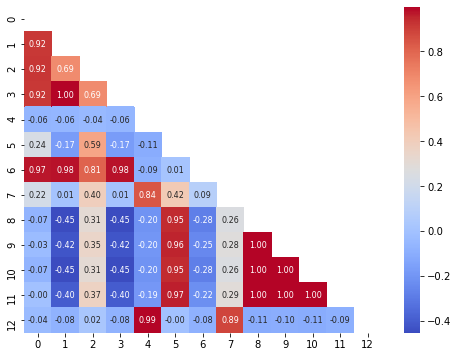

In [23]:
word_vectors=svd.components_.T
word_similarity_matrix = calc_similarity_matrix(word_vectors)
visualize_similarity(word_similarity_matrix)

In [ ]:
# 단어벡터 시각화2

In [41]:
%matplotlib inline
import matplotlib.font_manager as fm
import matplotlib

fontprop=fm.FontProperties(fname='C:/Windows/Fonts/MALGUNSL.TTF', size=12)

In [42]:
from sklearn.manifold import TSNE
import numpy as np
vectors = word_vectors
labels= tfidf_vect.get_feature_names()
def visualize_vectors(vectors, labels):
    tsne=TSNE(n_components=2, random_state=0, n_iter=1000, perplexity=2)
    np.set_printoptions(suppress=True)
    T=tsne.fit_transform(vectors)
    
    plt.figure(figsize=(10,6))
    plt.scatter(T[:,0], T[:,1], c="orange", edgecolors='r')
    for label, x, y in zip(labels, T[:,0], T[:,1]):
        plt.annotate(label, xy=(x+1,y+1), xytext=(0,0),\
                    textcoords="offset points",fontproperties=fontprop)

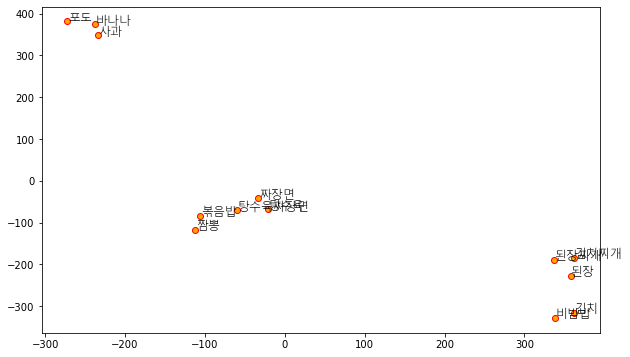

In [43]:
visualize_vectors(vectors, labels)